<a href="https://colab.research.google.com/github/ShowBaba/Machine-Learning-/blob/master/001_Copy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [0]:
# load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
z = test_df['EmployeeNo']
train_df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [0]:
train_df['Qualification'].unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

In [0]:
y = train_df.iloc[:, -1]

In [0]:
# merge the datasets for processing
df = [train_df, test_df]
df = pd.concat(df, keys=['x', 'y'])
df = df.drop(columns=['EmployeeNo', 'Promoted_or_Not'])
df.head(10)

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Channel_of_Recruitment                               Division  \
x 0  Direct Internal process         Commercial Sales and Marketing   
  1        Agency and others  Customer Support and Field Operations   
  2  Direct Internal process         Commercial Sales and Marketing   
  3        Agency and others         Commercial Sales and Marketing   
  4  Direct Internal process               Information and Strategy   
  5        Agency and others  Customer Support and Field Operations   
  6  Direct Internal process  Customer Support and Field Operations   
  7        Agency and others               Information and Strategy   
  8  Direct Internal process         Commercial Sales and Marketing   
  9  Direct Internal process         Commercial Sales and Marketing   

    Foreign_schooled  Gender  Last_performance_score Marital_Status  \
x 0               No  Female                    12.5        Married   
  1              Yes    Male                    12.5        Married   
  2              Yes    Male                     7.5        Married   
  3              Yes    Male                     2.5         Single   
  4              Yes    Male                     7.5        Married   
  5              Yes  Female                     7.5        Married   
  6               No    Male                     7.5         Single   
  7              Yes    Male                    10.0        Married   
  8              Yes    Male                    12.5        Married   
  9              Yes  Female                    12.5        Married   

    No_of_previous_employers Past_Disciplinary_Action  Previous_Award  \
x 0                        0                       No               0   
  1                        0                       No               0   
  2                        0                       No               0   
  3                        1                       No               0   
  4                        1                       No               0   
  5                        1                       No               0   
  6                        1                       No               0   
  7                        0                       No               0   
  8                        0                       No               0   
  9                        0                       No               0   

    Previous_IntraDepartmental_Movement        Qualification State_Of_Origin  \
x 0                                  No     MSc, MBA and PhD         ANAMBRA   
  1                                  No  First Degree or HND         ANAMBRA   
  2                                  No  First Degree or HND         KATSINA   
  3                                  No  First Degree or HND           NIGER   
  4                                  No  First Degree or HND       AKWA IBOM   
  5                                 Yes  First Degree or HND           ENUGU   
  6                                  No     MSc, MBA and PhD             OYO   
  7                                  No  First Degree or HND           LAGOS   
  8                                  No     MSc, MBA and PhD            ONDO   
  9                                  No  First Degree or HND           LAGOS   

     Targets_met  Training_score_average  Trainings_Attended  Year_of_birth  \
x 0            1                      41                   2           1986   
  1            0                      52                   2           1991   
  2            0                      42                   2           1987   
  3            0                      42                   3           1982   
  4            0                      77                   3           1990   
  5            0                      51                   2           1990   
  6            0                      55                   2           1988   
  7            0                      75                   2           1993   
  8            1                      46      

In [0]:
# check for null values
df.isnull().sum()

Channel_of_Recruitment                    0
Division                                  0
Foreign_schooled                          0
Gender                                    0
Last_performance_score                    0
Marital_Status                            0
No_of_previous_employers                  0
Past_Disciplinary_Action                  0
Previous_Award                            0
Previous_IntraDepartmental_Movement       0
Qualification                          2409
State_Of_Origin                           0
Targets_met                               0
Training_score_average                    0
Trainings_Attended                        0
Year_of_birth                             0
Year_of_recruitment                       0
dtype: int64

In [0]:
# filling the null values based on the "Foreign_schooled " column
df_null = df.groupby('Targets_met').Qualification.transform(lambda x: x.fillna(x.mode()[0]))

In [0]:
# dropping the "Qualification" column that has null values and adding the clean coolumn
df = df.drop(columns=['Qualification'])
df['Qualification'] = df_null  

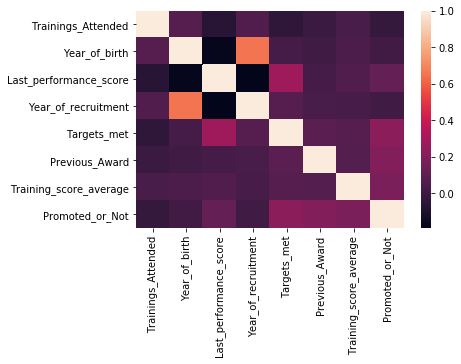

In [0]:
# data visualization
sns.heatmap(train_df.corr())

In [0]:
df.isnull().sum()

Channel_of_Recruitment                 0
Division                               0
Foreign_schooled                       0
Gender                                 0
Last_performance_score                 0
Marital_Status                         0
No_of_previous_employers               0
Past_Disciplinary_Action               0
Previous_Award                         0
Previous_IntraDepartmental_Movement    0
State_Of_Origin                        0
Targets_met                            0
Training_score_average                 0
Trainings_Attended                     0
Year_of_birth                          0
Year_of_recruitment                    0
Qualification                          0
dtype: int64

In [0]:
# collecting columns with categorical datas
cat_col = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat_col.append(i)
    else:
        pass
    
cat_col

['Channel_of_Recruitment',
 'Division',
 'Foreign_schooled',
 'Gender',
 'Marital_Status',
 'No_of_previous_employers',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'State_Of_Origin',
 'Qualification']

In [0]:
# using pandas's get dummies to encode
df = pd.get_dummies(df, columns=cat_col)
df.head()

Last_performance_score  Previous_Award  Targets_met  \
x 0                    12.5               0            1   
  1                    12.5               0            0   
  2                     7.5               0            0   
  3                     2.5               0            0   
  4                     7.5               0            0   

     Training_score_average  Trainings_Attended  Year_of_birth  \
x 0                      41                   2           1986   
  1                      52                   2           1991   
  2                      42                   2           1987   
  3                      42                   3           1982   
  4                      77                   3           1990   

     Year_of_recruitment  Channel_of_Recruitment_Agency and others  \
x 0                 2011                                         0   
  1                 2015                                         1   
  2                 2012                                         0   
  3                 2009                                         1   
  4                 2012                                         0   

     Channel_of_Recruitment_Direct Internal process  \
x 0                                               1   
  1                                               0   
  2                                               1   
  3                                               0   
  4                                               1   

     Channel_of_Recruitment_Referral and Special candidates  ...  \
x 0                                                  0       ...   
  1                                                  0       ...   
  2                                                  0       ...   
  3                                                  0       ...   
  4                                                  0       ...   

     State_Of_Origin_OYO  State_Of_Origin_PLATEAU  State_Of_Origin_RIVERS  \
x 0                    0                        0                       0   
  1                    0                        0                       0   
  2                    0                        0                       0   
  3                    0                        0                       0   
  4                    0                        0                       0   

     State_Of_Origin_SOKOTO  State_Of_Origin_TARABA  State_Of_Origin_YOBE  \
x 0                       0                       0                     0   
  1                       0                       0                     0   
  2                       0                       0                     0   
  3                       0                       0                     0   
  4                       0                       0                     0   

     State_Of_Origin_ZAMFARA  Qualification_First Degree or HND  \
x 0                        0                                  0   
  1                        0                                  1   
  2                        0                                  1   
  3                        0                                  1   
  4                        0                                  1   

     Qualification_MSc, MBA and PhD  Qualification_Non-University Education  
x 0                               1                                       0  
  1                               0                                       0  
  2                               0                                       0  
  3                               0                                       0  
  4                               0                                       0  

[5 rows x 77 columns]

In [0]:
df.shape

(54808, 77)

In [0]:
# splitting the dataset back to test and train using the keys 'x' & 'y'
train_df = df.loc['x']
test_df = df.loc['y']
train_df.shape
test_df.shape

(16496, 77)

In [0]:
train_df.shape

(38312, 77)

In [0]:
X = train_df.iloc[:, :]
# y = train_df.iloc[:, -1]
Z = test_df.iloc[:,:]

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concat two dataframe for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Speccs', 'Score']
# naming the dataframe columns
print(featureScores.nlargest(50,'Score'))

'Training_score_average', 'Previous_Award', 'Targets_met', 'Last_performance_score', 'Division_Commercial Sales and Marketing',
'Qualification_MSc, MBA and PhD', 'Division_People/HR Management', 'State_Of_Origin_ONDO', 'Division_Sourcing and Purchasing',
'Qualification_First Degree or HND', 'Division_Regulatory and Legal services', 'Division_Research and Innovation',
'Division_Information and Strategy', 'Trainings_Attended', 'State_Of_Origin_ABIA', 'Gender_Female',
'State_Of_Origin_OGUN', 'State_Of_Origin_ANAMBRA', 'State_Of_Origin_KWARA', 'Marital_Status_Not_Sure',
'Previous_IntraDepartmental_Movement_Yes', 'State_Of_Origin_NIGER', 'Division_Customer Support and Field Operations',
'State_Of_Origin_GOMBE', 'No_of_previous_employers_2', 'Gender_Male', 'State_Of_Origin_FCT', 'State_Of_Origin_OSUN',
'State_Of_Origin_TARABA', 'No_of_previous_employers_5', 'Past_Disciplinary_Action_Yes', 'State_Of_Origin_SOKOTO',
'No_of_previous_employers_0', 'State_Of_Origin_JIGAWA', 'State_Of_Origin_EBONYI', 'No_of_previous_employers_4',
'Marital_Status_Single', 'State_Of_Origin_KOGI'

                                               Speccs        Score
3                              Training_score_average  3934.505005
1                                      Previous_Award  1518.545947
2                                         Targets_met  1249.518420
0                              Last_performance_score   999.330013
13  Division_Information Technology and Solution S...    33.348765
11            Division_Commercial Sales and Marketing    24.296496
75                     Qualification_MSc, MBA and PhD    19.699993
15                      Division_People/HR Management    16.847330
9   Channel_of_Recruitment_Referral and Special ca...    14.047592
65                               State_Of_Origin_ONDO    12.394098
18                   Division_Sourcing and Purchasing     9.707663
74                  Qualification_First Degree or HND     7.859928
16             Division_Regulatory and Legal services     7.775183
17                   Division_Research and Innovation     4.67

('Marital_Status_Single', 'State_Of_Origin_KOGI')

In [0]:
X.columns

Index(['Last_performance_score', 'Previous_Award', 'Targets_met',
       'Training_score_average', 'Trainings_Attended', 'Year_of_birth',
       'Year_of_recruitment', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Foreign_schooled_No', 'Foreign_schooled_Yes', 'Gender_Female',
       'Gender_Male', 'Marital_Status_Married', 'Marital_Status_Not_Sure',
       'Marital_Status_Single', 'No_of_previous_employers_0',
       'No_of_previous_employers_1',

In [0]:
X = X[['Training_score_average', 'Previous_Award', 'Targets_met', 'Last_performance_score', 'Division_Commercial Sales and Marketing',
'Qualification_MSc, MBA and PhD', 'Division_People/HR Management', 'State_Of_Origin_ONDO', 'Division_Sourcing and Purchasing',
'Qualification_First Degree or HND', 'Division_Regulatory and Legal services', 'Division_Research and Innovation',
'Division_Information and Strategy', 'Trainings_Attended', 'State_Of_Origin_ABIA', 'Gender_Female',
'State_Of_Origin_OGUN', 'State_Of_Origin_ANAMBRA', 'State_Of_Origin_KWARA', 'Marital_Status_Not_Sure',
'Previous_IntraDepartmental_Movement_Yes', 'State_Of_Origin_NIGER', 'Division_Customer Support and Field Operations',
'State_Of_Origin_GOMBE', 'No_of_previous_employers_2', 'Gender_Male', 'State_Of_Origin_FCT', 'State_Of_Origin_OSUN',
'State_Of_Origin_TARABA', 'No_of_previous_employers_5', 'Past_Disciplinary_Action_Yes', 'State_Of_Origin_SOKOTO',
'No_of_previous_employers_0', 'State_Of_Origin_JIGAWA', 'State_Of_Origin_EBONYI', 'No_of_previous_employers_4',
'Marital_Status_Single', 'State_Of_Origin_KOGI']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [0]:
import xgboost as xgb
import time


start_time = time.time()
clf = xgb.XGBClassifier(max_depth=5,
                n_estimators=2500,
                learning_rate=0.1, 
                colsample_bytree=0.9,
                min_child_weight = 3,
                seed=1200,
                booster='dart'
                
                )
                
clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc",
        eval_set=[(X_train, y_train), (X_test, y_test)])

pred = clf.predict(X_test, ntree_limit=10)

clf.score(X_train, y_train)
print(f'Done in {time.time() - start_time} seconds')

[0]	validation_0-auc:0.831	validation_1-auc:0.8089
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.831583	validation_1-auc:0.811759
[2]	validation_0-auc:0.832405	validation_1-auc:0.81162
[3]	validation_0-auc:0.848962	validation_1-auc:0.836609
[4]	validation_0-auc:0.851747	validation_1-auc:0.836362
[5]	validation_0-auc:0.851292	validation_1-auc:0.838462
[6]	validation_0-auc:0.852076	validation_1-auc:0.838537
[7]	validation_0-auc:0.852311	validation_1-auc:0.837762
[8]	validation_0-auc:0.853401	validation_1-auc:0.838609
[9]	validation_0-auc:0.855058	validation_1-auc:0.839675
[10]	validation_0-auc:0.85965	validation_1-auc:0.848562
[11]	validation_0-auc:0.864797	validation_1-auc:0.852903
[12]	validation_0-auc:0.869165	validation_1-auc:0.860303
[13]	validation_0-auc:0.871252	validation_1-auc:0.863016
[14]	validation_0-auc:0.871732	validation_1-auc:0.863917
[15]	

[141]	validation_0-auc:0.919831	validation_1-auc:0.895542
[142]	validation_0-auc:0.919991	validation_1-auc:0.895454
[143]	validation_0-auc:0.920078	validation_1-auc:0.895599
[144]	validation_0-auc:0.920146	validation_1-auc:0.895571
[145]	validation_0-auc:0.92032	validation_1-auc:0.89552
[146]	validation_0-auc:0.920629	validation_1-auc:0.895493
[147]	validation_0-auc:0.920714	validation_1-auc:0.895424
[148]	validation_0-auc:0.92081	validation_1-auc:0.895594
[149]	validation_0-auc:0.921291	validation_1-auc:0.895882
[150]	validation_0-auc:0.921397	validation_1-auc:0.895833
[151]	validation_0-auc:0.921424	validation_1-auc:0.895805
[152]	validation_0-auc:0.921676	validation_1-auc:0.895832
[153]	validation_0-auc:0.922041	validation_1-auc:0.896149
[154]	validation_0-auc:0.922117	validation_1-auc:0.896111
[155]	validation_0-auc:0.92216	validation_1-auc:0.896205
[156]	validation_0-auc:0.922469	validation_1-auc:0.896129
[157]	validation_0-auc:0.922623	validation_1-auc:0.896312
[158]	validation_0

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Done in 108.53721857070923 seconds


C:\Users\SAMUEL PC\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
clf.score(X_train, y_train)
# 0.9430233425311358
# 0.9450696055684454

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9430974477958237

In [0]:
# predictions = clf.predict(Z)
# prediction = pd.DataFrame(predictions)
# prediction.index = z
# prediction.index.name = 'EmployeeNo'
# prediction.columns=['Promoted_or_Not']
# prediction.to_csv('predictions_9X.csv')

In [0]:
# stacking
pred = clf.predict(Z)
merged = pd.read_csv('predictions_10X.csv')
merged_values = merged['Promoted_or_Not'].values

ValueError: feature_names mismatch: ['Training_score_average', 'Previous_Award', 'Targets_met', 'Last_performance_score', 'Division_Commercial Sales and Marketing', 'Qualification_MSc, MBA and PhD', 'Division_People/HR Management', 'State_Of_Origin_ONDO', 'Division_Sourcing and Purchasing', 'Qualification_First Degree or HND', 'Division_Regulatory and Legal services', 'Division_Research and Innovation', 'Division_Information and Strategy', 'Trainings_Attended', 'State_Of_Origin_ABIA', 'Gender_Female', 'State_Of_Origin_OGUN', 'State_Of_Origin_ANAMBRA', 'State_Of_Origin_KWARA', 'Marital_Status_Not_Sure', 'Previous_IntraDepartmental_Movement_Yes', 'State_Of_Origin_NIGER', 'Division_Customer Support and Field Operations', 'State_Of_Origin_GOMBE', 'No_of_previous_employers_2', 'Gender_Male', 'State_Of_Origin_FCT', 'State_Of_Origin_OSUN', 'State_Of_Origin_TARABA', 'No_of_previous_employers_5', 'Past_Disciplinary_Action_Yes', 'State_Of_Origin_SOKOTO', 'No_of_previous_employers_0', 'State_Of_Origin_JIGAWA', 'State_Of_Origin_EBONYI', 'No_of_previous_employers_4', 'Marital_Status_Single', 'State_Of_Origin_KOGI'] ['Last_performance_score', 'Previous_Award', 'Targets_met', 'Training_score_average', 'Trainings_Attended', 'Year_of_birth', 'Year_of_recruitment', 'Channel_of_Recruitment_Agency and others', 'Channel_of_Recruitment_Direct Internal process', 'Channel_of_Recruitment_Referral and Special candidates', 'Division_Business Finance Operations', 'Division_Commercial Sales and Marketing', 'Division_Customer Support and Field Operations', 'Division_Information Technology and Solution Support', 'Division_Information and Strategy', 'Division_People/HR Management', 'Division_Regulatory and Legal services', 'Division_Research and Innovation', 'Division_Sourcing and Purchasing', 'Foreign_schooled_No', 'Foreign_schooled_Yes', 'Gender_Female', 'Gender_Male', 'Marital_Status_Married', 'Marital_Status_Not_Sure', 'Marital_Status_Single', 'No_of_previous_employers_0', 'No_of_previous_employers_1', 'No_of_previous_employers_2', 'No_of_previous_employers_3', 'No_of_previous_employers_4', 'No_of_previous_employers_5', 'No_of_previous_employers_More than 5', 'Past_Disciplinary_Action_No', 'Past_Disciplinary_Action_Yes', 'Previous_IntraDepartmental_Movement_No', 'Previous_IntraDepartmental_Movement_Yes', 'State_Of_Origin_ABIA', 'State_Of_Origin_ADAMAWA', 'State_Of_Origin_AKWA IBOM', 'State_Of_Origin_ANAMBRA', 'State_Of_Origin_BAUCHI', 'State_Of_Origin_BAYELSA', 'State_Of_Origin_BENUE', 'State_Of_Origin_BORNO', 'State_Of_Origin_CROSS RIVER', 'State_Of_Origin_DELTA', 'State_Of_Origin_EBONYI', 'State_Of_Origin_EDO', 'State_Of_Origin_EKITI', 'State_Of_Origin_ENUGU', 'State_Of_Origin_FCT', 'State_Of_Origin_GOMBE', 'State_Of_Origin_IMO', 'State_Of_Origin_JIGAWA', 'State_Of_Origin_KADUNA', 'State_Of_Origin_KANO', 'State_Of_Origin_KATSINA', 'State_Of_Origin_KEBBI', 'State_Of_Origin_KOGI', 'State_Of_Origin_KWARA', 'State_Of_Origin_LAGOS', 'State_Of_Origin_NASSARAWA', 'State_Of_Origin_NIGER', 'State_Of_Origin_OGUN', 'State_Of_Origin_ONDO', 'State_Of_Origin_OSUN', 'State_Of_Origin_OYO', 'State_Of_Origin_PLATEAU', 'State_Of_Origin_RIVERS', 'State_Of_Origin_SOKOTO', 'State_Of_Origin_TARABA', 'State_Of_Origin_YOBE', 'State_Of_Origin_ZAMFARA', 'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD', 'Qualification_Non-University Education']
training data did not have the following fields: State_Of_Origin_ADAMAWA, Past_Disciplinary_Action_No, State_Of_Origin_LAGOS, No_of_previous_employers_1, State_Of_Origin_PLATEAU, State_Of_Origin_DELTA, Channel_of_Recruitment_Direct Internal process, State_Of_Origin_KANO, No_of_previous_employers_More than 5, State_Of_Origin_KATSINA, State_Of_Origin_ENUGU, State_Of_Origin_BAUCHI, State_Of_Origin_ZAMFARA, State_Of_Origin_AKWA IBOM, Division_Information Technology and Solution Support, State_Of_Origin_BORNO, State_Of_Origin_EDO, Year_of_birth, Division_Business Finance Operations, Foreign_schooled_Yes, Marital_Status_Married, State_Of_Origin_OYO, State_Of_Origin_CROSS RIVER, Channel_of_Recruitment_Agency and others, No_of_previous_employers_3, Foreign_schooled_No, State_Of_Origin_RIVERS, State_Of_Origin_KEBBI, State_Of_Origin_KADUNA, State_Of_Origin_BENUE, State_Of_Origin_YOBE, Year_of_recruitment, State_Of_Origin_IMO, State_Of_Origin_BAYELSA, State_Of_Origin_EKITI, State_Of_Origin_NASSARAWA, Previous_IntraDepartmental_Movement_No, Qualification_Non-University Education, Channel_of_Recruitment_Referral and Special candidates

In [0]:
sums = pred+merged_values
merged['Promoted_or_Not'] = sums

In [0]:
merged['Promoted_or_Not'] = merged['Promoted_or_Not'].map(lambda x: x if x==0 else 1)

In [0]:
pd.value_counts(sums)

In [0]:
merged.to_csv('hy_test2.csv', index=False)

In [0]:
merged['Promoted_or_Not'].value_counts()

In [0]:
from vecstack import stacking

In [0]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

seed=10
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=seed)
adb = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(adb,X, y, cv=kfold)
# results.mean()

adb.fit(X_train, y_train)
adb.score(X_train, y_train)

In [0]:
models = [adb,
          clf,
         SVC(),
         KNeighborsClassifier(n_neighbors=5)]

In [0]:
S_train, S_test = stacking(models, X_train, y_train, X_test,
                          regression=True, mode='oof_pred_bag',
                          needs_proba=False, save_dir=None,
                          metric=accuracy_score, n_folds=4,
                          stratified=True, shuffle=True,
                          random_state=1, verbose=2)

In [0]:
adb.fit(S_train, y_train)
y_pred = new_model.predict(S_test)
adb.score(S_train, y_train)

In [0]:
# stacking
adb.predict(Z)
# merged = pd.read_csv('hy_test.csv')
# merged_values = merged['Promoted_or_Not'].values

In [0]:
sums = pred+merged_values
merged['Promoted_or_Not'] = sums

In [0]:
merged['Promoted_or_Not'] = merged['Promoted_or_Not'].map(lambda x: x if x==0 else 1)

In [0]:
merged.to_csv('hy_test4.csv', index=False)
merged['Promoted_or_Not'].value_counts()